In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/titanic/train.csv')
dff = pd.read_csv(r'/kaggle/input/titanic/test.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
dff.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The columns Name, Ticket are useless. So, lets remove them


In [7]:
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
type(df[['Age']])

pandas.core.frame.DataFrame

In [11]:
df[880:891]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
880,881,1,2,female,25.0,0,1,26.0000,S
881,882,0,3,male,33.0,0,0,7.8958,S
882,883,0,3,female,22.0,0,0,10.5167,S
883,884,0,2,male,28.0,0,0,10.5000,S
884,885,0,3,male,25.0,0,0,7.0500,S
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.groupby(['Embarked', 'Sex'])['Fare'].apply(lambda x: x.median())

Embarked  Sex   
C         female    56.92920
          male      24.00000
Q         female     7.76875
          male       7.75000
S         female    24.15000
          male      10.50000
Name: Fare, dtype: float64

In [15]:
#all(df.loc[:, 'Embarked'] == df.Embarked.isna())
df[df['Embarked'].isnull()]#.Embarked = 'C'
df.loc[[61, 829], 'Embarked'] = 'C'

In [16]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


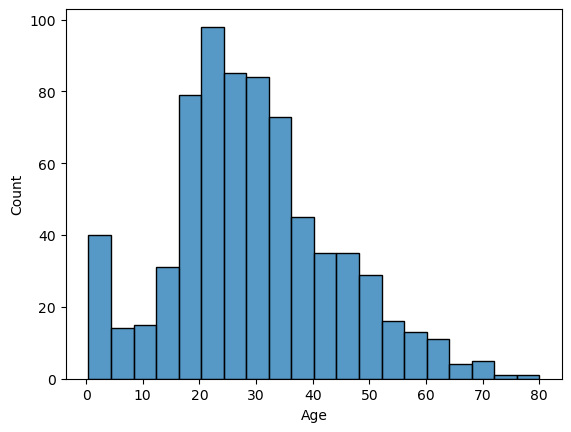

In [17]:
#df.Age.hist();
import matplotlib.pyplot as plt
import seaborn as sns
#plt.hist(df.Age);
sns.histplot(df.Age);

In [18]:
df.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

Filling the NA values of the Age column by grouping the based on Sex and Pclass

In [19]:
df[df.isna().any(axis = 1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,7.2292,C
863,864,0,3,female,NaN,8,2,69.5500,S
868,869,0,3,male,NaN,0,0,9.5000,S
878,879,0,3,male,NaN,0,0,7.8958,S


In [20]:
age_medians = df.groupby(['Sex', 'Pclass'])['Age'].median()
def fill_age(row):
    return age_medians[row['Sex'], row['Pclass']]
df['Age'] = df.apply(lambda row: fill_age(row) if pd.isnull(row['Age']) else row['Age'], axis = 1)

In [21]:
#age_medians['']
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [22]:
#(df.groupby(['Sex', 'Pclass'])['Age'].median())[df[0, :].Pclass]

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Load the Titanic dataset into a DataFrame

# Define the categorical columns to encode
cat_cols = ["Sex", "Pclass", "Embarked"]

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the categorical columns
encoder.fit(df[cat_cols])

# Transform the categorical columns using One-Hot Encoding
encoded_cols = encoder.transform(df[cat_cols]).toarray()

# Create new column names for the encoded columns
new_cols = []
for col in (encoder.get_feature_names_out(cat_cols)):
    new_cols.append(col)
    
# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=new_cols)

encoded_df.tail(10)

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
881,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
883,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
884,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
885,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
886,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
890,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [24]:
df = pd.concat([df, encoded_df], axis = 1)

In [25]:
df.shape

(891, 17)

In [26]:
df.drop(['Pclass', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [27]:
df.shape

(891, 14)

In [28]:
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,6,0,25.0,0,0,8.4583,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,7,0,54.0,0,0,51.8625,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,8,0,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,9,1,27.0,0,2,11.1333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,10,1,14.0,1,0,30.0708,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
df.set_index('PassengerId', inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    float64
 6   Sex_male    891 non-null    float64
 7   Pclass_1    891 non-null    float64
 8   Pclass_2    891 non-null    float64
 9   Pclass_3    891 non-null    float64
 10  Embarked_C  891 non-null    float64
 11  Embarked_Q  891 non-null    float64
 12  Embarked_S  891 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 97.5 KB


In [31]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'svc__C': [1, 5, 10, 50], 
#              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#grid = GridSearchCV(svc, param_grid)
#%time grid.fit(Xtrain, ytrain)
#print(grid.best_params_)

In [32]:
Y_train = df.pop('Survived')

In [33]:
type(Y_train)

pandas.core.series.Series

In [34]:
df

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
888,19.0,0,0,30.0000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,21.5,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
dff.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
dff.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [37]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [38]:
#dff.loc[dff.Fare.isna() == True].Fare = np.round(dff.Fare.mean(), 2)
dff[dff.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [39]:
dff.groupby(['Sex', 'Pclass'])['Fare'].median()

Sex     Pclass
female  1         79.02500
        2         26.00000
        3          8.08125
male    1         51.86250
        2         13.00000
        3          7.89580
Name: Fare, dtype: float64

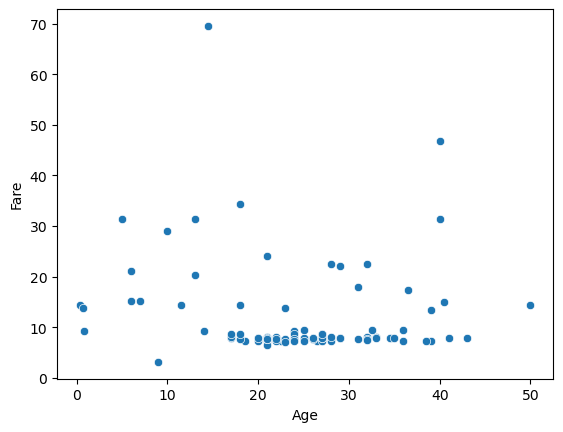

In [40]:
sns.scatterplot(data = (dff.query('Pclass == 3 and Sex == "male"')), x = 'Age', y = 'Fare');

In [41]:
dff.Fare.fillna( value=30, inplace = True)

In [42]:
dff.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [43]:
age_medians = dff.groupby(['Sex', 'Pclass'])['Age'].median()
def fill_age(row):
    return age_medians[row['Sex'], row['Pclass']]
dff['Age'] = dff.apply(lambda row: fill_age(row) if pd.isnull(row['Age']) else row['Age'], axis = 1)

In [44]:
#(dff.groupby(['Sex', 'Pclass'])['Age'].median())#.loc['female', 1]
dff.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

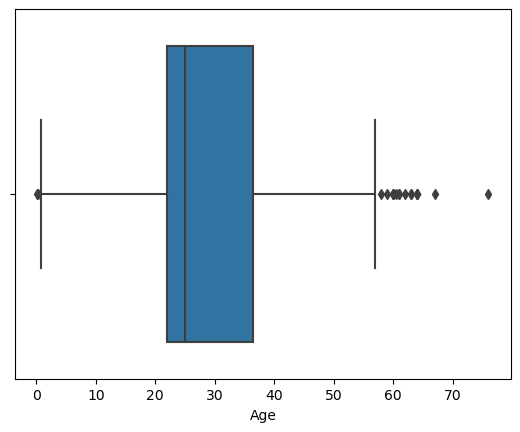

In [45]:
sns.boxplot(x = dff.Age);

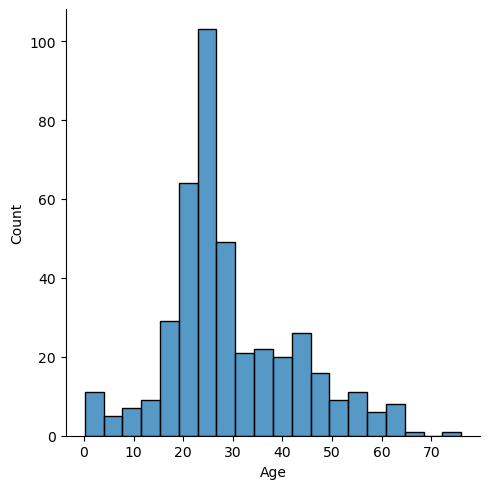

In [46]:
sns.displot(dff.Age);

In [47]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [48]:
# Define the categorical columns to encode
cat_cols = ["Sex", "Pclass", "Embarked"]

# Create an instance of the OneHotEncoder class
encoder1 = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the categorical columns
encoder1.fit(dff[cat_cols])

# Transform the categorical columns using One-Hot Encoding
encoded_cols1 = encoder1.transform(dff[cat_cols]).toarray()

# Create new column names for the encoded columns
new_cols1 = []
for col in (encoder.get_feature_names_out(cat_cols)):
    new_cols1.append(col)
    
# Create a new DataFrame with the encoded columns
encoded_df1 = pd.DataFrame(encoded_cols1, columns=new_cols)

encoded_df1.tail(10)

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
408,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
409,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
410,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
411,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
416,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
417,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [49]:
encoded_df1.head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
dff.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [51]:
dff = pd.concat([dff, encoded_df1], axis = 1)

In [52]:
dff.drop(['Pclass', 'Sex', 'Embarked'], inplace = True, axis = 1)
dff.set_index('PassengerId', inplace = True)
dff.tail(10)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1300,22.0,0,0,7.7208,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1301,3.0,1,1,13.7750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1302,22.0,0,0,7.7500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1303,37.0,1,0,90.0000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1304,28.0,0,0,7.7750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1305,24.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1306,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1307,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1308,24.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
df

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
888,19.0,0,0,30.0000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,21.5,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## ___svc___

In [54]:
#from sklearn import svm
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

In [55]:
#model = make_pipeline(StandardScaler(), svm.LinearSVC(random_state= 20, max_iter = 10000))#.fit(df, Y_train)#.predict(Xtest)
#Y_Pred = model.fit(df, Y_train).predict(dff)

In [56]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Define the pipeline
# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('svc', SVC())
# ])

# # Define the parameter grid to search over
# param_grid = {
#     'svc__C': [0.1, 1, 10, 100],
#     'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'svc__gamma': ['scale', 'auto']
# }

# # Define the GridSearchCV object
# grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# # Fit the GridSearchCV object to the training data
# grid.fit(df, Y_train)

# # Print the best parameters and score
# print("Best parameters: ", grid.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid.best_score_))

In [57]:
# model = make_pipeline(StandardScaler(), svm.LinearSVC(random_state= 20, max_iter = 10000))#.fit(df, Y_train)#.predict(Xtest)
# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('svc', SVC(kernel='rbf', gamma='scale', C=1))
# ])
# Y_pred = pipe.fit(df, Y_train).predict(dff)

## ____dtc____

In [58]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# dtc = DecisionTreeClassifier()

# # Define hyperparameters for grid search
# params = {'max_depth': [3, 5, 7],
#           'min_samples_split': [2, 5, 10],
#           'min_samples_leaf': [1, 2, 4]}

# # Create GridSearchCV object
# grid_search = GridSearchCV(dtc, params, cv=5, scoring='accuracy')

# # Fit GridSearchCV object to data
# grid_search.fit(df, Y_train)

# # Print best hyperparameters and corresponding accuracy score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best accuracy score: ", grid_search.best_score_)

In [59]:
#dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=1)
#Y_Pred = dtc.fit(df, Y_train).predict(dff)

## ___NN___

In [60]:
# Import necessary libraries

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature scaling
scaler = StandardScaler()
df = scaler.fit_transform(df)
dff = scaler.fit_transform(dff)

X_train, X_val, y_train, y_val = train_test_split(df, Y_train, test_size=0.2, random_state=42)


# Define the neural network
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=df.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))




#y_pred_nn = model.predict_classes(X_test)
y_pred_nn = (model.predict(dff) > 0.5).astype("int32")
# Evaluate the model
#loss, accuracy = model.evaluate(X_test, y_test)
#print('Test loss:', loss)
#print('Test accuracy:', accuracy)

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.5478 - val_loss: 0.6328 - val_accuracy: 0.6760
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.6826 - val_loss: 0.5826 - val_accuracy: 0.7263
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7303 - val_loss: 0.5378 - val_accuracy: 0.7430
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.7683 - val_loss: 0.5019 - val_accuracy: 0.7598
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.7739 - val_loss: 0.4732 - val_accuracy: 0.7821
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7879 - val_loss: 0.4585 - val_accuracy: 0.7821
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.8076 - val_loss: 0.4501 - val_accuracy: 0.7765
Epoch 8/100


In [61]:
y_pred_nn.shape
y_pred_nn = y_pred_nn.flatten()

In [62]:
op1 = pd.DataFrame({'PassengerId': range(892, 892+len(y_pred_nn)), 'Survived': y_pred_nn})
op1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
op1.set_index('PassengerId', inplace = True)
op1

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [64]:
print('Pruthvinth')

Pruthvinth


In [65]:
op1.to_csv('output.csv')